# Import libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('Database:', os.path.join(dirname, filename))

Database: /kaggle/input/bitcoin-btc-usd-stock-dataset/BTC-USD_stock_data.csv


# Read data
---

In [2]:
file_path = '/kaggle/input/bitcoin-btc-usd-stock-dataset/BTC-USD_stock_data.csv'
df_btc_usd = pd.read_csv(file_path)

display(df_btc_usd)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...,...
2831,2024-10-02,60836.324219,62357.687500,59996.949219,60632.785156,60632.785156,40762722398
2832,2024-10-03,60632.484375,61469.039062,59878.804688,60759.402344,60759.402344,36106447279
2833,2024-10-04,60754.625000,62465.992188,60459.941406,62067.476562,62067.476562,29585472513
2834,2024-10-05,62067.609375,62371.023438,61689.582031,62089.949219,62089.949219,13305410749


# Data treatment
---

In [3]:
# Check data type

df_btc_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2836 non-null   object 
 1   Open       2836 non-null   float64
 2   High       2836 non-null   float64
 3   Low        2836 non-null   float64
 4   Close      2836 non-null   float64
 5   Adj Close  2836 non-null   float64
 6   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


In [4]:
df_btc_usd['Date'] = pd.to_datetime(df_btc_usd['Date'])

Adjusted Close - Reflects real market value changes, considering splits or dividends

Percentage Change - Refers to the percentage change in a stock’s price

In [5]:
# Add Percent Change on the df

df_btc_usd['Auto_pct'] = df_btc_usd['Adj Close'].pct_change()

In [6]:
min_date = min(df_btc_usd['Date'])
max_date = max(df_btc_usd['Date'])

print(f'Min Date: {min_date}')
print(f'Max Date: {max_date}')

Min Date: 2017-01-01 00:00:00
Max Date: 2024-10-06 00:00:00


In [7]:
# Checking null values

df_btc_usd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Auto_pct     1
dtype: int64

Auto_pct contains 1 null values of the first row, It's ok, but we'll remove

In [8]:
df_btc_usd = df_btc_usd.dropna()

# Data Analytics
---

## Statistical describe

In [9]:
df_btc_usd_describe = df_btc_usd.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

display(df_btc_usd_describe)

,Date,Open,High,Low,Close,Adj Close,Volume,Auto_pct
count,2835,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2.835000e+03,2835.000000
mean,2020-11-19 00:00:00,23249.554611,23775.751308,22688.748123,23269.892504,23269.892504,2.288705e+10,0.002180
min,2017-01-02 00:00:00,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07,-0.371695
1%,2017-01-30 08:09:36,974.938103,1003.004387,938.551194,973.132252,973.132252,1.347978e+08,-0.101887
25%,2018-12-11 12:00:00,7278.310303,7439.949463,7123.090088,7284.104004,7284.104004,7.737562e+09,-0.013868
50%,2020-11-19 00:00:00,16602.269531,16807.527344,16320.634766,16604.464844,16604.464844,2.026622e+10,0.001366
75%,2022-10-28 12:00:00,37472.132812,38610.017578,36428.162109,37507.876953,37507.876953,3.252194e+10,0.017996
99%,2024-09-07 15:50:24,69133.803437,70124.645000,67560.502969,69133.344531,69133.344531,7.859861e+10,0.109573
max,2024-10-06 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11,0.252472
std,NaN,19765.362753,20198.799456,19289.364466,19772.893579,19772.893579,1.888768e+10,0.037760


In [10]:
for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Auto_pct']:
    
    print(f'Column >> {i}')
    print(f"Min to 1% difference = {((df_btc_usd_describe.at['1%', i]/df_btc_usd_describe.at['min', i])-1)*100} %")    
    print(f"99% to Max difference = {((df_btc_usd_describe.at['max', i]/df_btc_usd_describe.at['99%', i])-1)*100} %")
    print('-'*50)

Column >> Open
Min to 1% difference = 25.769581960292022 %
99% to Max difference = 5.707152458445264 %
--------------------------------------------------
Column >> High
Min to 1% difference = 21.826290664243373 %
99% to Max difference = 5.169973142110029 %
--------------------------------------------------
Column >> Low
Min to 1% difference = 24.18706790156857 %
99% to Max difference = 5.585498353965002 %
--------------------------------------------------
Column >> Close
Min to 1% difference = 25.120343291109904 %
99% to Max difference = 5.713820871149133 %
--------------------------------------------------
Column >> Adj Close
Min to 1% difference = 25.120343291109904 %
99% to Max difference = 5.713820871149133 %
--------------------------------------------------
Column >> Volume
Min to 1% difference = 121.51857713095934 %
99% to Max difference = 346.5320036897181 %
--------------------------------------------------
Column >> Auto_pct
Min to 1% difference = -72.58848478049677 %
99% to 

All price variables: Open, High, Low, Close, Adj Close have close percentage variability, what's expect.

The Volume variable, have huge differences between Min - 1% and 99% - Max values. That's indicate high variability on trading numbers.

The Auto_pct variable, have big differences between Min - 1% and 99% - Max values. That's indicate that a significant devaluation and valuation in specific days.

## Line plot of High and Low Price (USD) over time

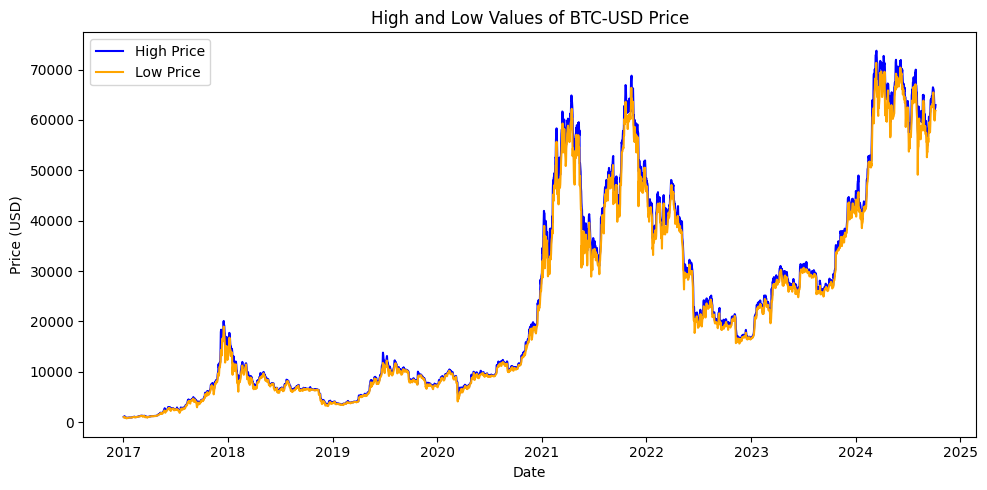

In [11]:
plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['High'], label='High Price', color='blue')
plt.plot(df_btc_usd['Date'], df_btc_usd['Low'], label='Low Price', color='orange')

plt.title('High and Low Values of BTC-USD Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

## Bar plot of Daily Percentage Change over time

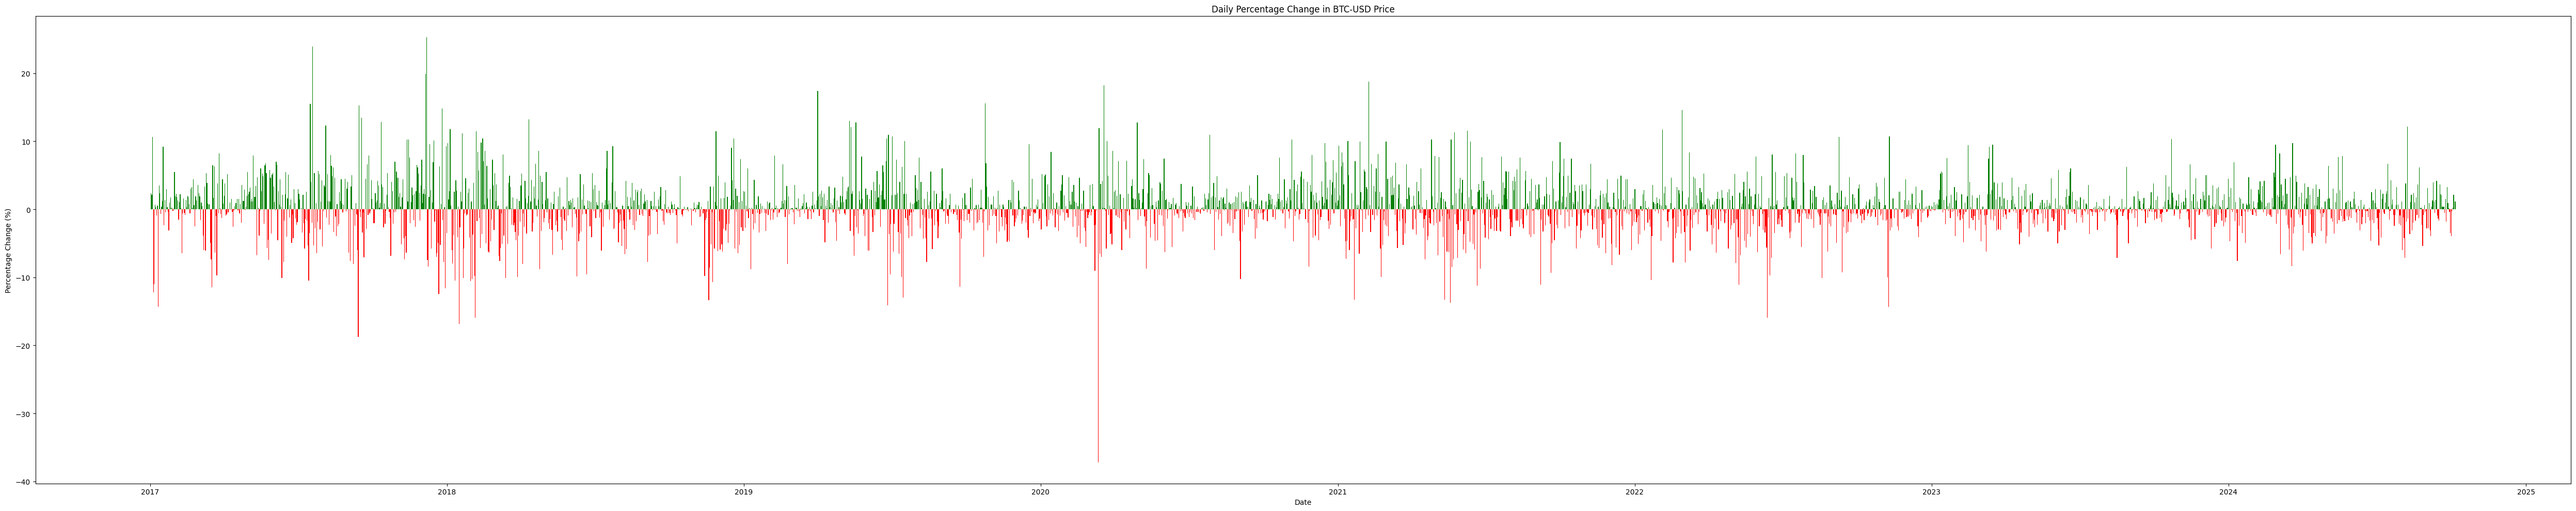

In [12]:
plt.figure(figsize=(50, 10))

colors = df_btc_usd['Auto_pct'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_btc_usd['Date'], (df_btc_usd['Auto_pct'])*100, color=colors)

plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Daily Percentage Change in BTC-USD Price')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [13]:
min_auto_pct = min(df_btc_usd['Auto_pct'])
row_df_min_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == min_auto_pct]

display(row_df_min_auto_pct)

,Date,Open,High,Low,Close,Adj Close,Volume,Auto_pct
1166,2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243,-0.371695


In [14]:
max_auto_pct = max(df_btc_usd['Auto_pct'])
row_df_max_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == max_auto_pct]

display(row_df_max_auto_pct)

,Date,Open,High,Low,Close,Adj Close,Volume,Auto_pct
340,2017-12-07,14266.099609,17899.699219,14057.299805,17899.699219,17899.699219,17950699520,0.252472


## Blox plot of Daily Percentage Change

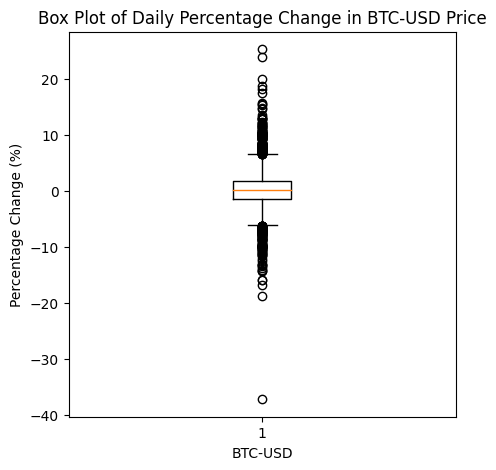

In [15]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Auto_pct']*100, vert=True)

plt.title('Box Plot of Daily Percentage Change in BTC-USD Price')
plt.ylabel('Percentage Change (%)')
plt.xlabel('BTC-USD')

plt.show()

## Line plot of Cumulative Daily Percentage Change in BTC-USD Price over time

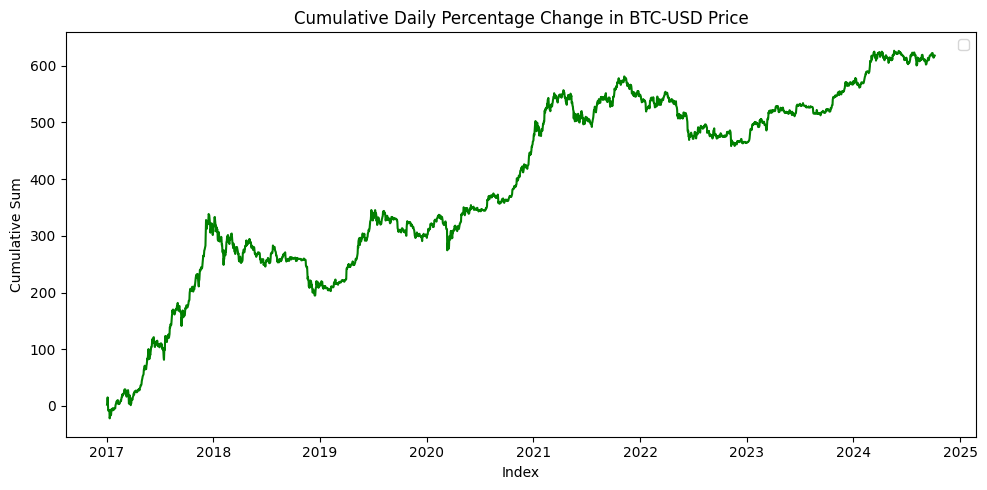

In [16]:
df_btc_usd['Cumulative_Auto_pct'] = df_btc_usd['Auto_pct'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


## Bar plot of Volume over time

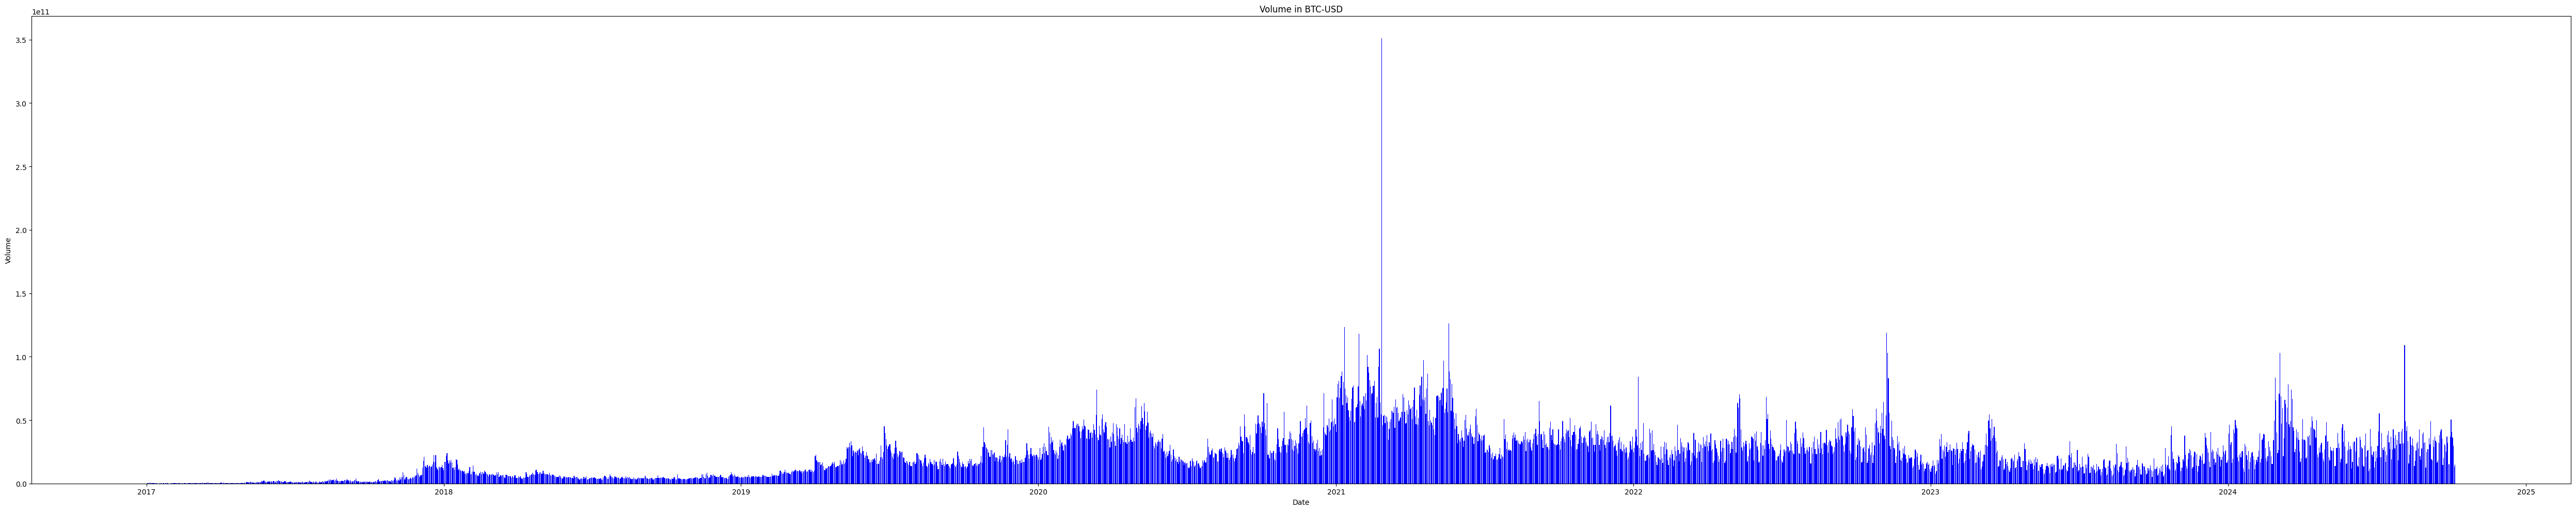

In [17]:
plt.figure(figsize=(50,10))

plt.bar(df_btc_usd['Date'], df_btc_usd['Volume'], color='blue')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume in BTC-USD')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [18]:
min_volume = min(df_btc_usd['Volume'])
row_df_min_volume = df_btc_usd.loc[df_btc_usd['Volume'] == min_volume]

display(row_df_min_volume)

,Date,Open,High,Low,Close,Adj Close,Volume,Auto_pct,Cumulative_Auto_pct
28,2017-01-29,922.067017,923.41803,919.14801,919.495972,919.495972,60851700,-0.002272,-0.043903


In [19]:
max_volume = max(df_btc_usd['Volume'])
row_df_max_volume = df_btc_usd.loc[df_btc_usd['Volume'] == max_volume]

display(row_df_max_volume)

,Date,Open,High,Low,Close,Adj Close,Volume,Auto_pct,Cumulative_Auto_pct
1517,2021-02-26,47180.464844,48370.785156,44454.84375,46339.761719,46339.761719,350967941479,-0.016012,5.224041


## Blox plot of Volume Trade

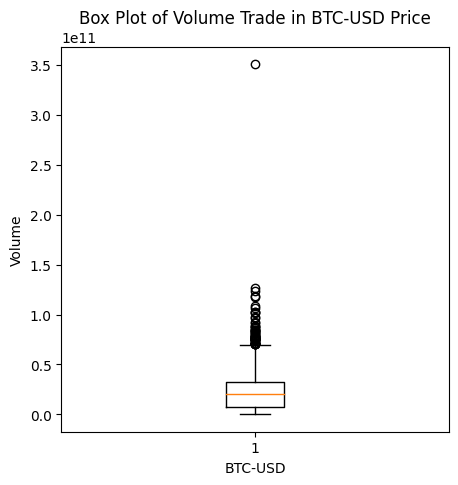

In [20]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Volume'], vert=True)

plt.title('Box Plot of Volume Trade in BTC-USD Price')
plt.ylabel('Volume')
plt.xlabel('BTC-USD')

plt.show()

# Tranding Indicators Test
---

This indicator compare the price moving avarege of 7 days vs 40 days

When MA 7 > MA 40 = BUY

When MA 7 < MA 40 = SOLD

## Moving Avarege 7 and 40 days - Trade Strategy

In [21]:
df_MA_trade_btc_usd = df_btc_usd.copy()

In [22]:
# Calculate MA values
df_MA_trade_btc_usd['MA_short'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_trade_btc_usd['MA_long'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=40).mean()

# Creating Order column
df_MA_trade_btc_usd['Order'] = 0
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] > df_MA_trade_btc_usd['MA_long']), 'Order'] = 1
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] < df_MA_trade_btc_usd['MA_long']), 'Order'] = -1

# Calculate return
df_MA_trade_btc_usd["MA_return"] = df_MA_trade_btc_usd["Auto_pct"] * df_MA_trade_btc_usd["Order"]

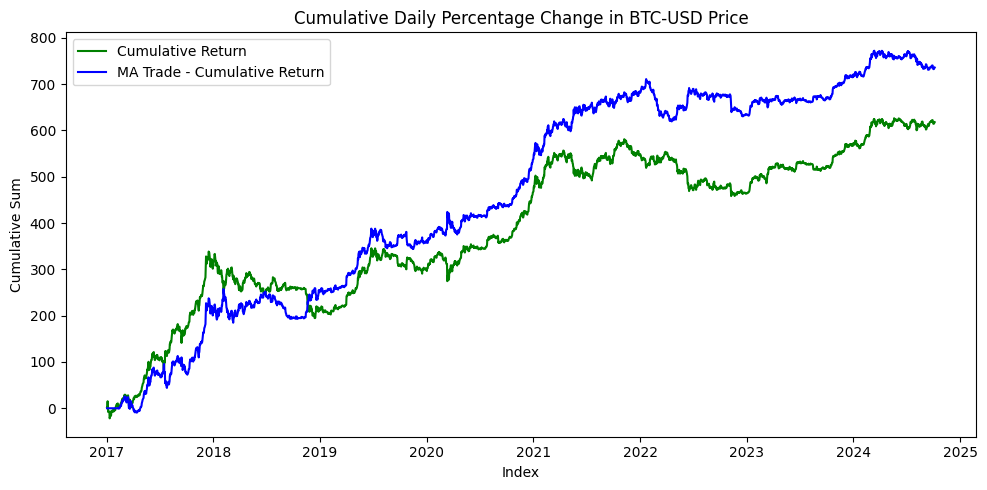

In [23]:
df_MA_trade_btc_usd['Cumulative_MA_return'] = df_MA_trade_btc_usd['MA_return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

## Moving Avarege 7 and 40 days - Buy and Sold Strategy

In [24]:
df_MA_buysold_btc_usd = df_btc_usd.copy()

In [25]:
# Calculate the MA to short and long period
df_MA_buysold_btc_usd['MA_short'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_buysold_btc_usd['MA_long'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=40).mean()

# Check the positon of MA values with short days as reference
df_MA_buysold_btc_usd['MA_short_over_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] > df_MA_buysold_btc_usd['MA_long'])
df_MA_buysold_btc_usd['MA_short_under_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] < df_MA_buysold_btc_usd['MA_long'])

# Map changes on position
df_MA_buysold_btc_usd['CHANGE_MA'] = (df_MA_buysold_btc_usd['MA_short_over_MA_long'] != df_MA_buysold_btc_usd['MA_short_over_MA_long'].shift(1))

# Crate the ORDER indicator
df_MA_buysold_btc_usd['ORDER'] = '-'

df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_over_MA_long'] == True), 'ORDER'] = 'BUY'
df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_under_MA_long'] == True), 'ORDER'] = 'SOLD'

# Calculate the return after the SOLD

df_MA_buysold_return = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] != '-']

df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)

df_MA_buysold_return.fillna(0, inplace=True)

# Merge the return with the MA database

df_MA_buysold_btc_usd = pd.merge(df_MA_buysold_btc_usd, df_MA_buysold_return[['Date', 'Return']], on='Date', how='left')

df_MA_buysold_btc_usd.fillna(0, inplace=True)

/tmp/ipykernel_17/4249265192.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)
/tmp/ipykernel_17/4249265192.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.fillna(0, inplace=True)


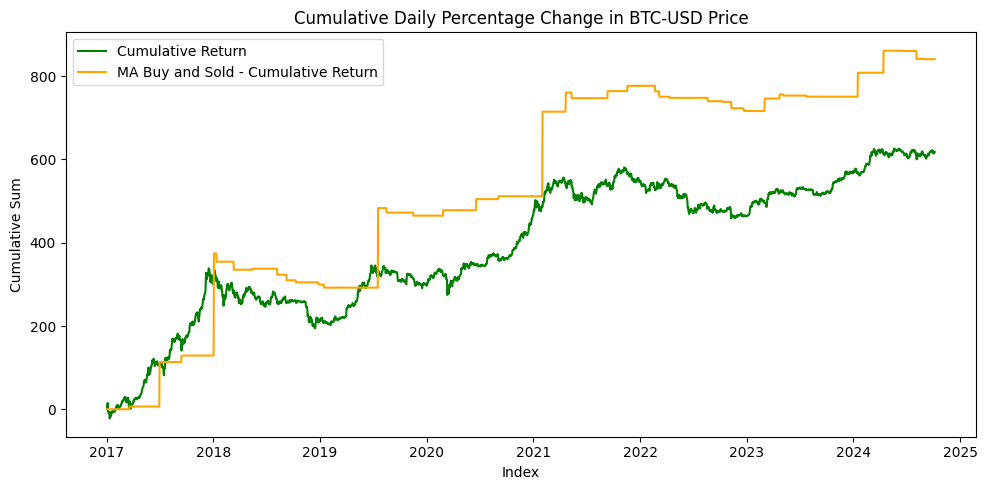

In [26]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


# Comparing returns

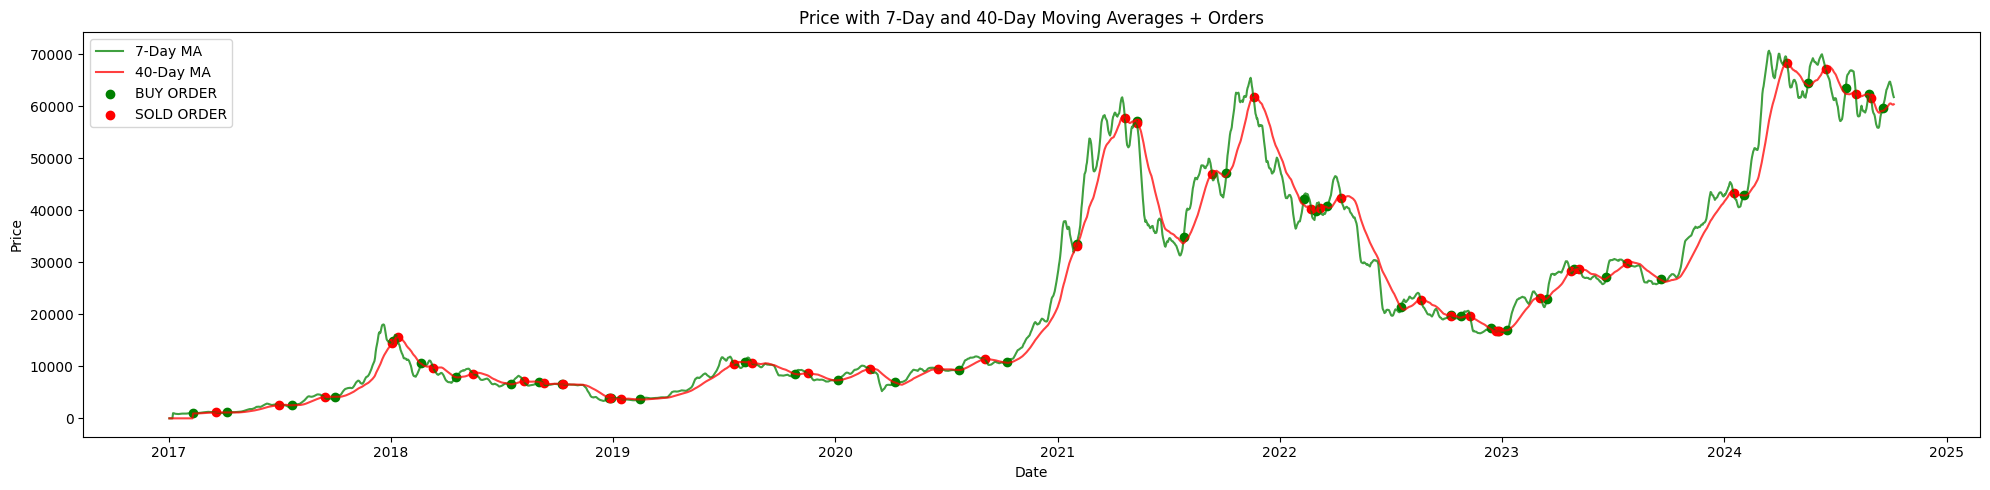

In [27]:
plt.figure(figsize=(20, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_short'], label='7-Day MA', color='green', alpha=0.75)
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_long'], label='40-Day MA', color='red', alpha=0.75)

# Target the BUY points
high_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'BUY']
plt.scatter(high_points['Date'], high_points['MA_short'], color='green', marker='o', label='BUY ORDER')

# Target the SOLD points
low_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'SOLD']
plt.scatter(low_points['Date'], low_points['MA_long'], color='red', marker='o', label='SOLD ORDER')

plt.title('Price with 7-Day and 40-Day Moving Averages + Orders')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(False)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

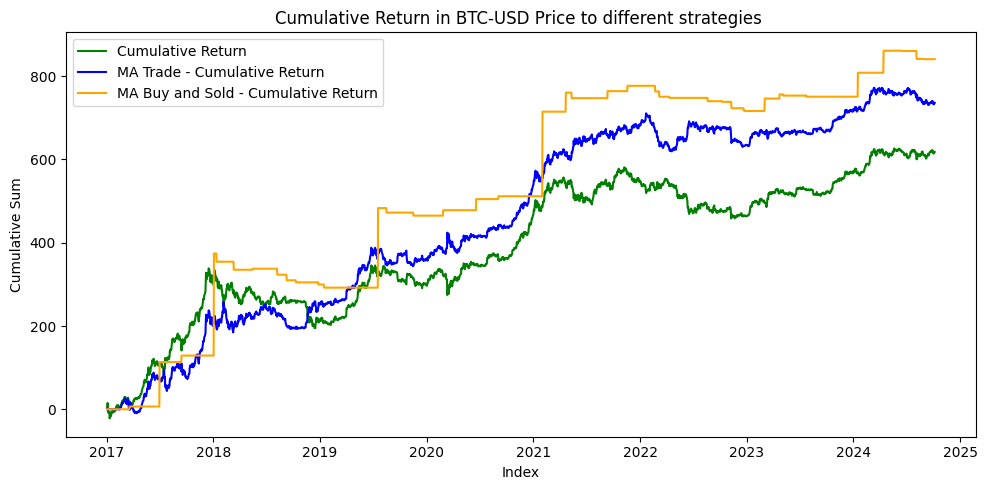

In [28]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Return in BTC-USD Price to different strategies ')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


BTC percent return over the days = 617,9099 %

BTC percent return with MA Trade Strategy = 735,9885 %

BTC percent return with MA Buy and Sold Strategy = 840,8983 %